In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , roc_auc_score

In [3]:
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((76020, 370), (76020,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Removing constant, quasi-constant and duplicate features

In [7]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [8]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [9]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [10]:
X_train_T.duplicated().sum()

17

In [11]:
duplicated_features = X_train_T.duplicated()

In [12]:
features_to_keep = [not index for index in duplicated_features]

In [13]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [15]:
X_train_unique.shape, X_test_unique.shape

((60816, 257), (15204, 257))

## Calculating the ROC_AUC Score

In [21]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    clf.fit(X_train_unique[feature].to_frame(),y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    
    roc_auc.append(roc_auc_score(y_test,y_pred))

In [22]:
roc_auc

[0.5034894869450824,
 0.4999657581153267,
 0.5,
 0.49989727434598,
 0.501507439248526,
 0.5005056650411062,
 0.49993151623065335,
 0.5007963228993799,
 0.5007620810147065,
 0.5007278391300333,
 0.5007963228993799,
 0.49994903533443963,
 0.5004714231564329,
 0.5007620810147065,
 0.5014899201447396,
 0.5057287469381384,
 0.5007620810147065,
 0.5014556782600663,
 0.5057287469381384,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4999657581153267,
 0.49989727434598,
 0.5,
 0.5,
 0.49993151623065335,
 0.49989727434598,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5006251134760132,
 0.5000175191037863,
 0.5,
 0.5014644378119595,
 0.50

In [23]:
roc_values = pd.Series(roc_auc)
roc_values.indexes = X_train_unique.columns
roc.values.sort_value(ascending = False, inplace = True)

In [24]:
# if roc_value = 50 means they are geussing and should be removed
roc_values

0      0.503489
1      0.499966
2      0.500000
3      0.499897
4      0.501507
         ...   
252    0.500000
253    0.500000
254    0.500000
255    0.500000
256    0.503352
Length: 257, dtype: float64

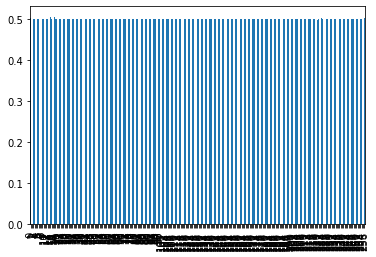

In [27]:
roc_values.plot.bar()

In [31]:
# selecting the values  you need

sel = roc_values[roc_values>0.5]
sel

0      0.503489
4      0.501507
5      0.500506
7      0.500796
8      0.500762
9      0.500728
10     0.500796
12     0.500471
13     0.500762
14     0.501490
15     0.505729
16     0.500762
17     0.501456
18     0.505729
100    0.500625
101    0.500018
103    0.501464
104    0.500625
122    0.500625
154    0.500728
160    0.500488
223    0.501593
225    0.502603
226    0.500728
227    0.500762
256    0.503352
dtype: float64

In [32]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

KeyError: '[154, 103] not in index'

## Building the model 

In [33]:
def run_randomForest(X_train,X_test, y_train,y_test):
    clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set : ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_roc,X_test_roc, y_train, y_test)

In [ ]:
X_train_roc.shape

### Feature selection using RMSE Regression

In [35]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [39]:
boston = load_boston()


In [43]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)


In [47]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame(),y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,y_pred))

In [49]:
mse

[76.38674157646072,
 84.66034377707906,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731934,
 78.30831374720842,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [51]:
mse = pd.Series(mse, index = X_train.columns)
mse.sort_values(ascending = False , inplace = True)

In [53]:
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

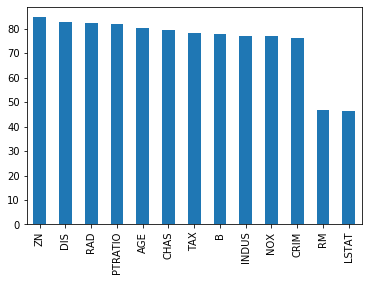

In [55]:
mse.plot.bar()

In [57]:
X_train_2 = X_train[['RM','LSTAT']]
X_test_2 = X_test[['RM','LSTAT']]


In [60]:
model = LinearRegression()
model.fit(X_train_2,y_train)
y_pred = model.predict(X_test_2)

print('r2_score: ', r2_score(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
np.std(y)

r2_score:  0.5409084827186417
RMSE:  6.114172522817781


9.188011545278203